In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file (with header)
df = pd.read_csv('../mpi_scaling_results/mpi_times.csv')

# Show the dataframe
df

,node,MPI_task,Thread,Comm,min,max,avg
0,1,7,16,0.083397,0.144448,0.164623,0.147274
1,2,7,16,0.145029,0.070147,0.096524,0.074716
2,4,7,16,0.451019,0.034024,0.048897,0.037077
3,8,7,16,0.487436,0.020692,0.032085,0.026211


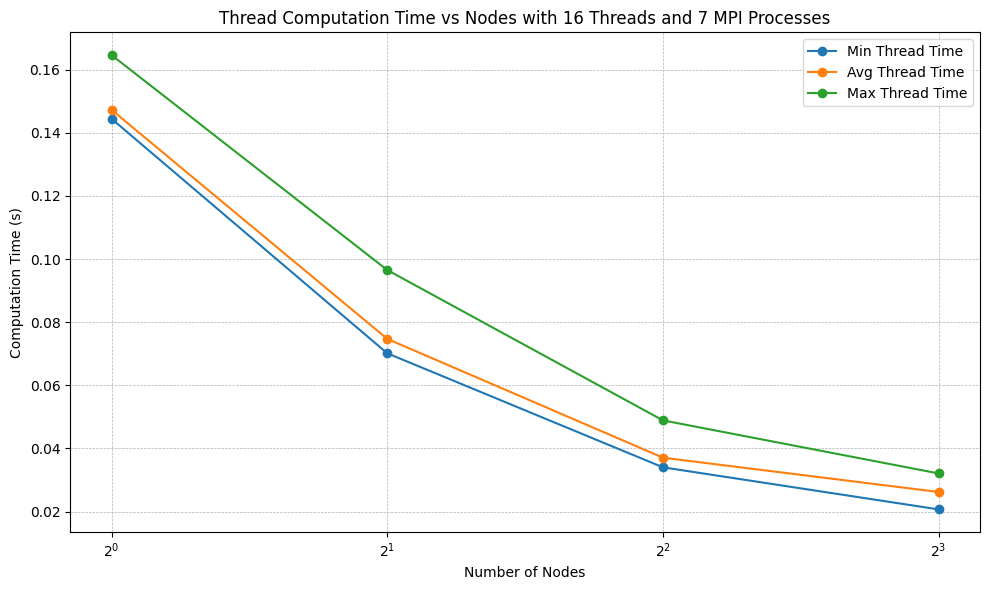

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(df['node'], df['min'], marker='o', label='Min Thread Time')
plt.plot(df['node'], df['avg'], marker='o', label='Avg Thread Time')
plt.plot(df['node'], df['max'], marker='o', label='Max Thread Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Computation Time (s)')
plt.title('Thread Computation Time vs Nodes with 16 Threads and 7 MPI Processes')
# Set x-axis to logarithmic scale and show all axis
plt.xticks(df['node'], labels=df['node'])
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

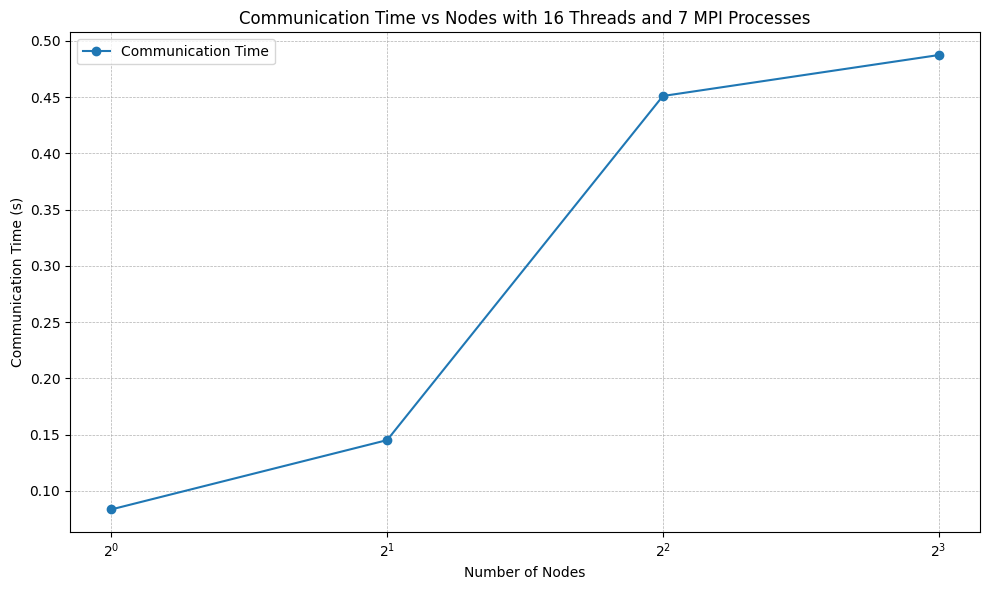

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df['node'], df['Comm'], marker='o', label='Communication Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Communication Time (s)')
plt.title('Communication Time vs Nodes with 16 Threads and 7 MPI Processes')
# Set x-axis to logarithmic scale and show all axis
plt.xticks(df['node'], labels=df['node'])
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Use avg time for speedup/efficiency
base_time = df['avg'].iloc[0]  # avg time for 1 thread
df['Speedup'] = base_time / df['avg']
df['Efficiency'] = df['Speedup'] / df['node']
df

,node,MPI_task,Thread,Comm,min,max,avg,Speedup,Efficiency
0,1,7,16,0.083397,0.144448,0.164623,0.147274,1.000000,1.000000
1,2,7,16,0.145029,0.070147,0.096524,0.074716,1.971117,0.985559
2,4,7,16,0.451019,0.034024,0.048897,0.037077,3.972112,0.993028
3,8,7,16,0.487436,0.020692,0.032085,0.026211,5.618786,0.702348


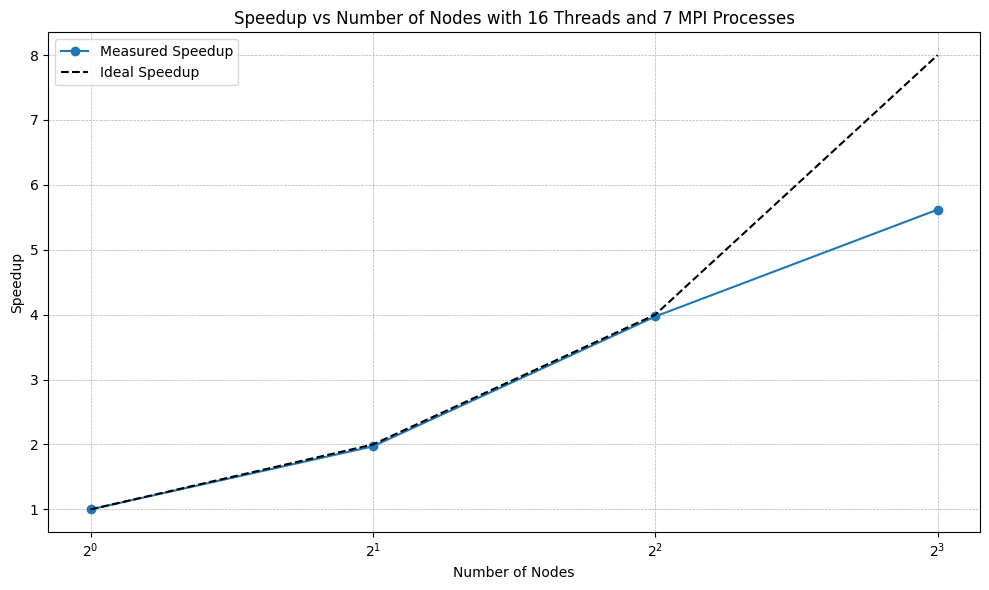

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['node'], df['Speedup'], marker='o', label='Measured Speedup')
plt.plot(df['node'], df['node'], 'k--', label='Ideal Speedup')  # Ideal: speedup = threads
plt.xlabel('Number of Nodes')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Nodes with 16 Threads and 7 MPI Processes')
plt.xscale('log', base=2)
plt.xticks(df['node'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

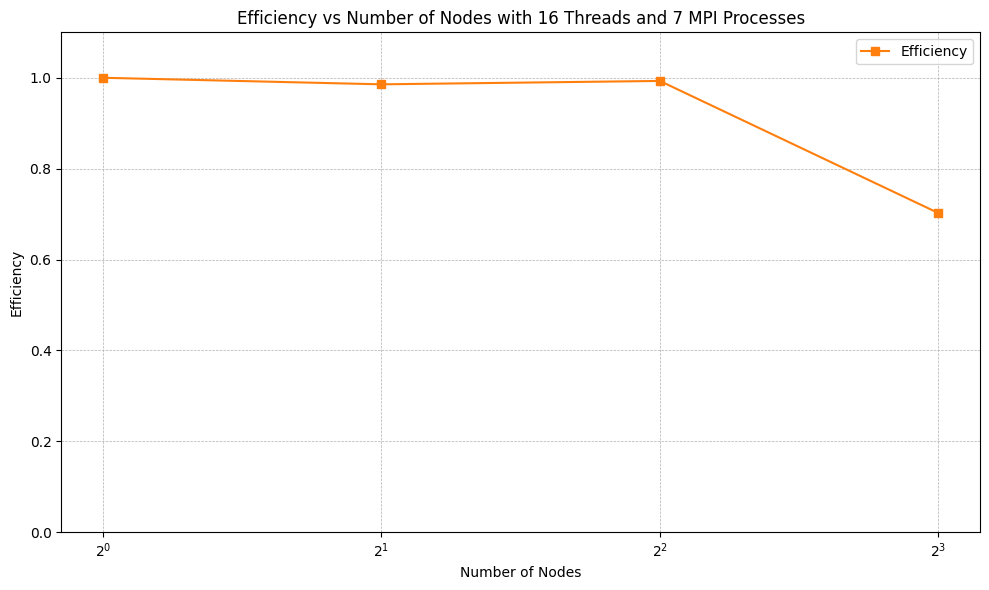

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['node'], df['Efficiency'], marker='s', color='tab:orange', label='Efficiency')
plt.xlabel('Number of Nodes')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Nodes with 16 Threads and 7 MPI Processes')
plt.xscale('log', base=2)
plt.xticks(df['node'])
plt.ylim(0, 1.1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()